**Simple Linear Regression 2 (Boston Housing database)**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:




*   **CRIM** - per capita crime rate by town
*   **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

*   **INDUS** - proportion of non-retail business acres per town.

*   **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   **NOX** - nitric oxides concentration (parts per 10 million)

*   **RM** - average number of rooms per dwelling

*   **AGE** - proportion of owner-occupied units built prior to 1940

*   **DIS** - weighted distances to five Boston employment centres

*   **RAD** - index of accessibility to radial highways

*   **TAX** - full-value property-tax rate per $10,000

*   **PTRATIO** - pupil-teacher ratio by town

*   **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


*   **LSTAT** - % lower status of the population

*   **MEDV** - Median value of owner-occupied homes in $1000's








**1. Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**2.Importing Datasets**

In [2]:
dataset=pd.read_csv('HousingData.csv')

**3.EDA for dataset**

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
dataset.shape

(506, 14)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560262,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


**4.Checking for Missing data**

In [8]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: True


In [9]:
dataset=dataset.fillna(dataset.mean())
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**5.Correlation between Variables**

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       -0.370163  0.167431 

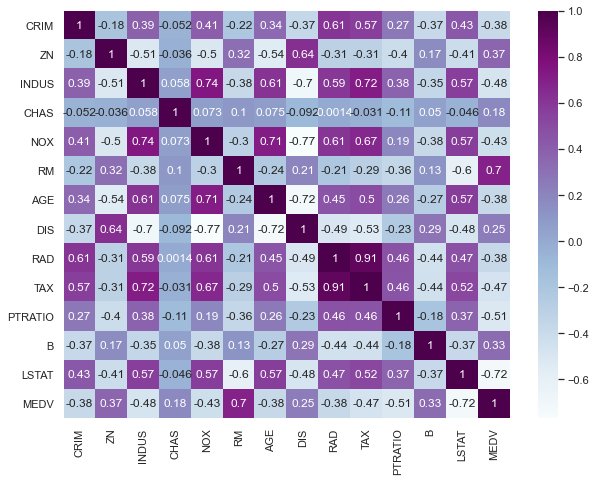

In [11]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

By looking at the correlation matrix we can see that **RM** has a strong positive correlation with **MEDV (0.7)**, **PTRATIO** which has negative correlation with **MEDV(-0.51)** and **LSTAT** has a high negative correlation with **MEDV (-0.72)**.

**6.Dependent and Independent Variable**

In [14]:
X = dataset.iloc[:,:-1].values
#X = dataset[['RM','LSTAT','PTRATIO']]
y = dataset.iloc[:,-1].values
#print(X)
#print(y)

**7.Splitting the dataset**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (337, 13)
y_train: (337,)
X_test: (169, 13)
y_test: (169,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
print('Explained variation: {}'.format(pca.explained_variance_ratio_))

Explained variation: [0.47217721 0.10694978 0.09603822 0.06927484 0.06515412 0.04860002
 0.03947911 0.03189555 0.02110436 0.01778503 0.01416238 0.0128819
 0.00449749]


# Modelling

In [19]:
#by importing pyforest we can generate almost 40 regression model
import pyforest
from lazypredict.Supervised import LazyRegressor
regressions = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = regressions.fit(X_train, X_test, y_train, y_test)
print(models)

C:\Users\S.A.N\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00,  9.73it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.87       0.88  3.19        0.23
HistGradientBoostingRegressor                0.86       0.87  3.38        0.41
GradientBoostingRegressor                    0.86       0.87  3.39        0.16
LGBMRegressor                                0.84       0.85  3.59        0.06
RandomForestRegressor                        0.83       0.84  3.76        0.35
BaggingRegressor                             0.81       0.82  3.96        0.05
XGBRegressor                                 0.80       0.82  4.00        1.52
PoissonRegressor                             0.79       0.81  4.13        0.01
AdaBoostRegressor                            0.78       0.80  4.20        0.12
KNeighborsRegressor                          0.77       0.79  4.31        0.03
SGDRegressor                                 0.73   

Hope! The basic steps for the regression types for the Boston Housing dataset got understood! Happy Learning



**PREMANAND S**